In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_openml

In [ ]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)

In [ ]:
display(X.shape,y.shape)

(70000, 784)

(70000,)

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)

        cov_matrix = np.cov(x - self.mean, rowvar=False)

        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T

        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        #self.sorted_components = self.eigen_values.argsort()[::-1]

        #self.projection_matrix = self.eigen_vectors[:,self.sorted_components][:,:self.no_of_components]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance =self.eigen_values[self.sorted_components[:self.no_of_components]]
        self.explained_variance_ratio_ = self.explained_variance / self.eigen_values.sum()

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]),
                    va="bottom",
                    ha="center",
                    fontsize=12)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [ ]:
scale=StandardScaler()


In [ ]:
X_1=scale.fit_transform(X)

In [ ]:

pca1=PCA(n_components=4)
pca1.fit(X_1)

PCA(n_components=4)

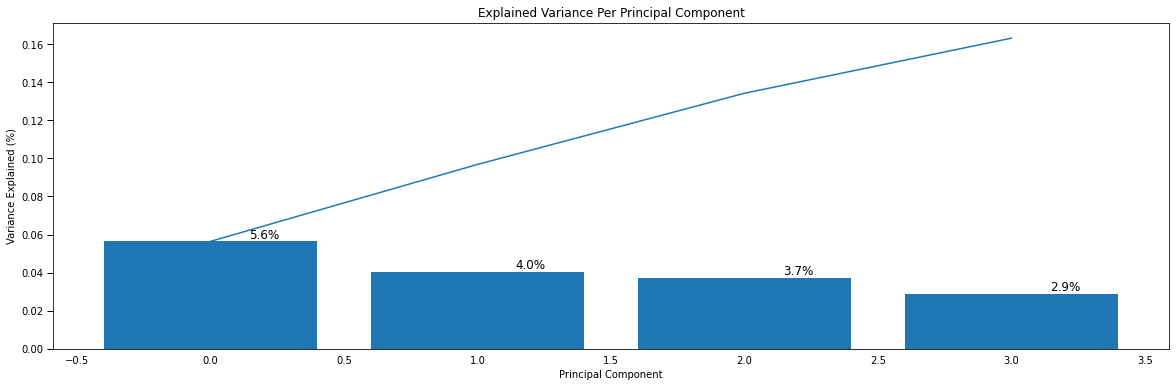

In [ ]:
scree_plot(pca1)

In [ ]:
x_pca_1=pca1.transform(X_1)
df_comp1=pd.DataFrame(x_pca_1)
df_comp1

0         1         2          3
0      -0.891724 -4.929819 -0.092784  -8.064296
1       8.813527 -7.517642 -3.713978  -1.766755
2       2.204852  9.824973 -5.752643   1.480061
3      -6.534620 -4.029461  3.523825  -0.217478
4      -5.251618  3.278793 -6.182246   1.462547
...          ...       ...       ...        ...
69995   3.917879  2.892363  9.949287  -2.026995
69996   3.988382  3.381713  7.713901  -7.299525
69997  -5.222593 -1.184291 -4.754868   0.148479
69998  -2.177726 -6.994910 -3.229126   1.891244
69999  11.777865 -5.403139  2.322886  12.295126

[70000 rows x 4 columns]

In [ ]:
df_comp1.shape

(70000, 4)

In [ ]:
pca=convers_pca(no_of_components=4)
pca.fit(X_1)

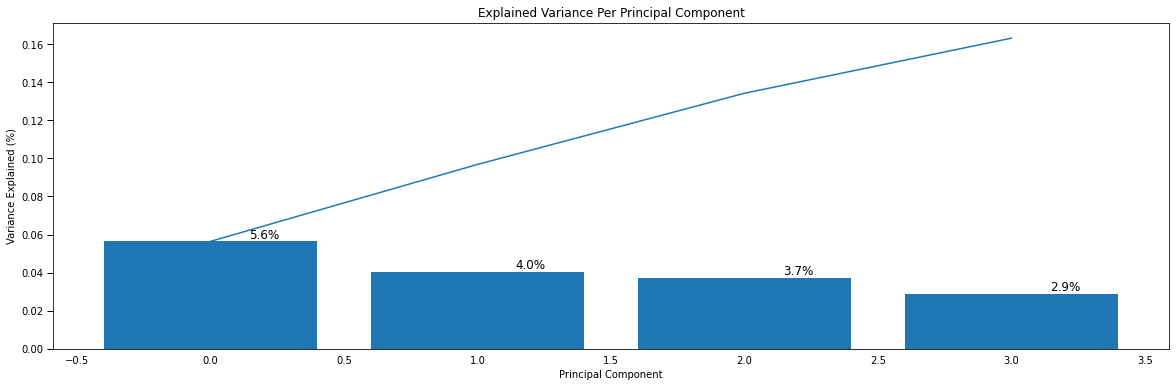

In [ ]:
scree_plot(pca)

In [ ]:

x_pca=pca.transform(X_1)
x_pca #data_reduced

df_comp=pd.DataFrame(x_pca)
df_comp

0         1         2          3
0      -0.891720  4.929711  0.093038  -8.064180
1       8.813530  7.517560  3.714185  -1.766171
2       2.204835 -9.824461  5.752488   1.479673
3      -6.534627  4.029669 -3.524017  -0.218098
4      -5.251618 -3.278848  6.182219   1.462658
...          ...       ...       ...        ...
69995   3.917881 -2.892419 -9.949220  -2.026794
69996   3.988380 -3.381637 -7.714120  -7.300283
69997  -5.222595  1.184316  4.754725   0.148113
69998  -2.177729  6.995033  3.228737   1.890282
69999  11.777872  5.402981 -2.322725  12.295654

[70000 rows x 4 columns]

In [ ]:
class KMeans_1(object):

    def __init__(self): #No need to implement
        pass

    def pairwise_dist(self, x, y): # [5 pts]
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between
                x[i, :] and y[j, :]
                """
        x2 = np.sum(x**2, 1)
        y2 = np.sum(y**2, 1)
        xy = x @ y.T
        d2 = -2 * xy + y2 + x2[:, np.newaxis]
        d2[d2 < 0] = 0
        return np.sqrt(d2)

    def _init_centers(self, points, K, **kwargs): # [5 pts]
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers.
        """
        idx = np.random.randint(points.shape[0], size=K)
        return points[idx, :]

    def _update_assignment(self, centers, points): # [10 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point

        Hint: You could call pairwise_dist() function.
        """
        dist = self.pairwise_dist(points, centers) #NxK
        return np.argmin(dist, 1)

    def _update_centers(self, old_centers, cluster_idx, points): # [10 pts]
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        weights = np.zeros((points.shape[0], old_centers.shape[0])) #NxK
        weights[np.arange(points.shape[0]), cluster_idx] = 1

        sums = np.einsum('NK,ND->KD', weights, points)
        return sums / np.sum(weights, 0)[:, np.newaxis]

    def _get_loss(self, centers, cluster_idx, points): # [5 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans.
        """
        chosen_centers = centers[cluster_idx, :] #NxD
        return np.sum((chosen_centers - points) ** 2)

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss

    def find_optimal_num_clusters(self, data, max_K=15): # [10 pts]
        """Plots loss values for different number of clusters in K-Means

        Args:
            image: input image of shape(H, W, 3)
            max_K: number of clusters
        Return:
            losses: an array of loss denoting the loss of each number of clusters
        """

        x = np.arange(1, max_K)
        y = np.zeros(x.shape)
        for i in range(max_K - 1):
            cluster_idx, centers, loss = self.__call__(data, i + 1)
            y[i] = loss
        fig = plt.figure()
        plt.plot(x, y)
        plt.show()
        return y

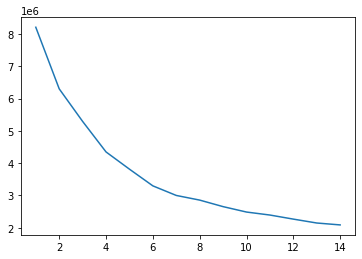

array([8211449.10896802, 6302673.53264231, 5293366.57079383,
       4347308.13175936, 3813654.79749574, 3295899.39884399,
       2999122.68600774, 2854839.49609363, 2652389.61035435,
       2484619.0257404 , 2391911.07627365, 2265513.09667956,
       2144928.21605829, 2085773.28617103])

In [ ]:

KMeans_1().find_optimal_num_clusters(df_comp.values)

<Figure size 720x432 with 0 Axes>

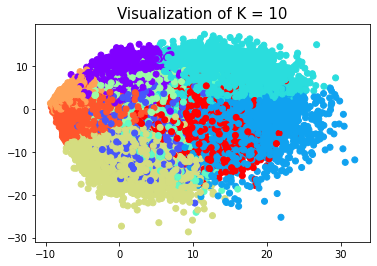

In [ ]:
def visualise(X, C, K):# Visualization of clustering. You don't need to change this function
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=C,cmap='rainbow')
    plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass

cluster_idx1, centers1, loss1 = KMeans_1()(df_comp.values, 10)
visualise(df_comp.values, cluster_idx1, 10)


In [ ]:
pd.crosstab(y,cluster_idx1, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания     0     1     2     3     4     5     6     7     8     9
Метки                                                                   
0              957   277  2050  2922    54   301    18   106    39   179
1              137    17     0     0    14    22     0  7681     6     0
2              425   457    87   518  2272  2168    82   551    47   383
3             1590  3643    32    71   545   131   140   848   136     5
4               34     3   103    62     6   581  1648   753  3407   227
5             2628  1387   124    48   223   387   177   675   654    10
6              112    15    28    90    66  3763     3   871     4  1924
7              153    19    14    13     7    16  2184   666  4216     5
8             2490  1466   115   108   160   125   239  1634   481     7
9              116    73    76    36     4    12  1819   542  4248    32

<Figure size 720x432 with 0 Axes>

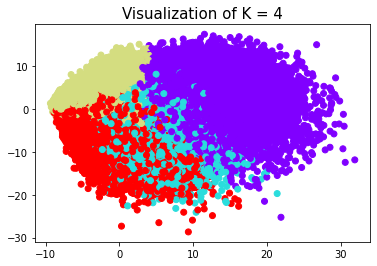

In [ ]:
cluster_idx1, centers1, loss1 = KMeans_1()(df_comp.values, 4)
visualise(df_comp.values, cluster_idx1, 4)


In [ ]:
pd.crosstab(y,cluster_idx1, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания     0     1     2     3
Метки                               
0             5526   571   748    58
1                0    37  7838     2
2             1730  2969  2093   198
3              248  4358  2227   308
4              472   122  1950  4280
5              266  1778  3559   710
6             2210   424  4166    76
7               36    35  1224  5998
8              354  1628  4260   583
9              144   126  1427  5261

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def findOptimalK():
    wcss = list()
    for k in range(1, 15):
        kmeans = KMeans(n_clusters=k)
        kmeans = kmeans.fit(df_comp)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(15, 6))
    plt.plot(range(1, 15), wcss, marker = "o")

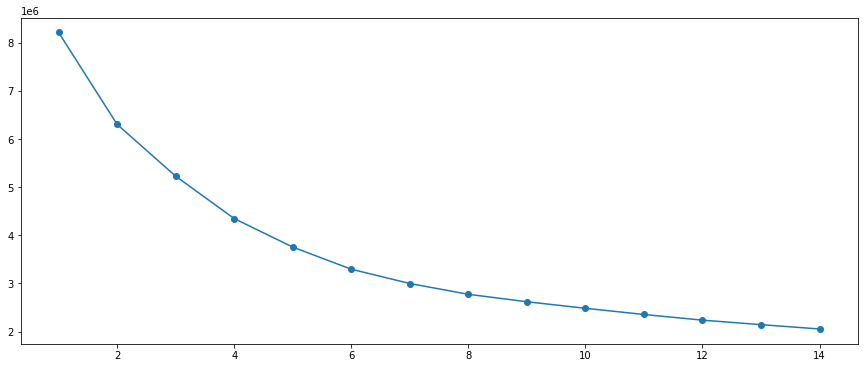

In [ ]:
findOptimalK()

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 35)

In [ ]:
k_means.fit(df_comp)

KMeans(n_clusters=10, n_init=35)

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([9, 5, 8, ..., 7, 9, 3], dtype=int32)

In [ ]:
G = len(np.unique(k_means_labels))
cluster_index= [[] for i in range(G)] #Number of labels
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue

In [ ]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n]=y[cluster_index[n]] #Y_clust[0] contains array of answers for the cluster_index[0]
    assert(len(Y_clust[n])==len(cluster_index[n]))


In [ ]:
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [ ]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1]

{'0': 107,
 '1': 7660,
 '2': 680,
 '3': 575,
 '4': 662,
 '5': 761,
 '6': 1512,
 '7': 443,
 '8': 1381,
 '9': 329}

In [ ]:
pd.crosstab(y,k_means_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания     0     1     2     3     4     5     6     7     8     9
Метки                                                                   
0               92   107    54   198   404  3273  1730    31    14  1000
1                0  7660    12    17    21     0     0    34     0   133
2               73   680  1625  2830   473   466   121    94    58   570
3               25   575  1424   107  3293    73    13   281   144  1206
4             2169   662     9   253     0    28   273  2128  1269    33
5              525   761   521    95  1417    53    73   333   172  2363
6                4  1512    29  4362    28    85   684     4     3   165
7             1447   443    10     7    17     1    16  3352  1875   125
8              252  1381   461    41  1623    95    84   452   203  2233
9             1302   329    21    11    68    22   111  3508  1501    85

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
df_comp.shape

(70000, 4)

In [ ]:
x_pca.shape

(70000, 4)

In [ ]:
layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)

colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(11)]
for i in range(0,10):
    my_members = (k_means_labels == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=df_comp.values[my_members, 0],
            y=df_comp.values[my_members, 1],
            z=df_comp.values[my_members, 2],
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
    #             line=dict(shape='spline')
            )

    #data.append(trace1)
fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9]], layout=layout)

py.offline.iplot(fig)

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_

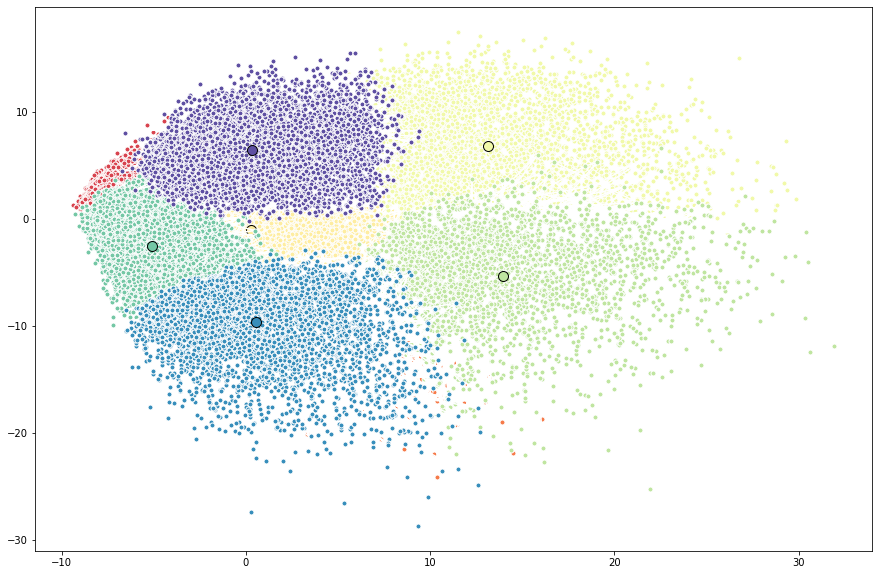

In [ ]:
fig = plt.figure(figsize=(15, 10))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1,)
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(df_comp.values[my_members, 0], df_comp.values[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)
plt.show()

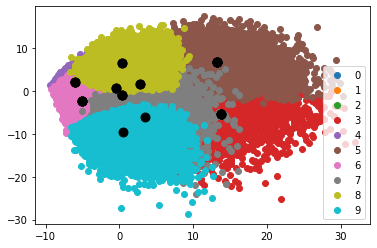

In [ ]:
label = k_means.fit_predict(df_comp.values)
centroids = k_means.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df_comp.values[label == i , 0] , df_comp.values[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()